In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
cd drive/MyDrive/MIR\ Experiments/model_inputs

/content/drive/MyDrive/MIR Experiments/model_inputs


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


Define a function to generate the model.

In [ ]:
from tensorflow import keras
import tensorflow as ts

def generate_model(input_shape):

  model = keras.Sequential()

  #1st Layer
  model.add(keras.layers.Conv2D(16, (3,3), strides=(1,1), activation='relu', input_shape=input_shape))
  model.add(keras.layers.MaxPool2D((2,2)))
  model.add(keras.layers.BatchNormalization())

  #2nd Layer
  model.add(keras.layers.Conv2D(32, (3,3), strides=(1,1), activation='relu', input_shape=input_shape))
  model.add(keras.layers.MaxPool2D((2,2)))
  model.add(keras.layers.BatchNormalization())

  #3rd Layer
  model.add(keras.layers.Conv2D(64, (3,3), strides=(1,1), activation='relu', input_shape=input_shape))
  model.add(keras.layers.MaxPool2D((2,2)))
  model.add(keras.layers.BatchNormalization())

  #4th Layer
  model.add(keras.layers.Conv2D(128, (3,3), strides=(1,1), activation='relu', input_shape=input_shape))
  model.add(keras.layers.MaxPool2D((2,2)))
  model.add(keras.layers.BatchNormalization())

  #5th Layer
  model.add(keras.layers.Conv2D(256, (3,3), strides=(1,1), activation = 'relu', input_shape=input_shape))
  model.add(keras.layers.MaxPool2D((2,2)))
  model.add(keras.layers.BatchNormalization())

  #Flatten output
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dropout(rate=0.3))

  #Output Layer
  model.add(keras.layers.Dense(10, activation='softmax'))

  #compile the network
  optimizer = keras.optimizers.Adam(learning_rate=0.0005)
  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model

Train the model.

In [ ]:
train_dir = 'sorted/train/'
test_dir = 'sorted/test/'
val_dir = 'sorted/val/'

train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,color_mode='rgba',
                                                    class_mode='categorical',
                                                    batch_size=128)

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,color_mode='rgba',
                                                    class_mode='categorical',
                                                    batch_size=128)

val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(val_dir,color_mode='rgba',
                                                    class_mode='categorical',
                                                    batch_size=128)

#flow_from_directory loads the images as size 256x256 as default.
input_shape = (256,256,4)

#build the model
augmented_model = generate_model(input_shape)
augmented_model.summary()

#train the CNN
history = augmented_model.fit(train_generator,epochs=100,validation_data=val_generator)

#evaluate the CNN on the test set
test_error, test_accuracy = augmented_model.evaluate(test_generator, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

Found 8000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
Found 1500 images belonging to 10 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      592       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 16)     64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0    

In [ ]:
augmented_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      592       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 16)     64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                        

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


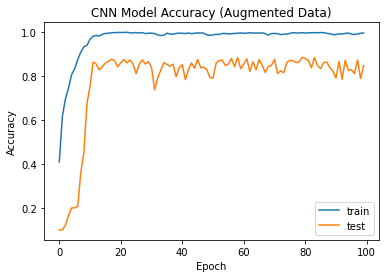

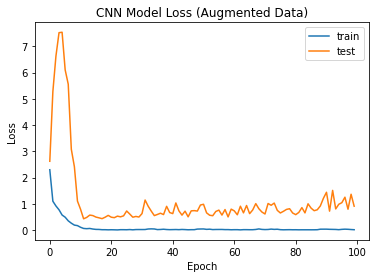

In [ ]:
print(history.history.keys())
# summarize history for accuracy
fig = plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model Accuracy (Augmented Data)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model Loss (Augmented Data)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
cd ..

/content/drive/MyDrive/MIR Experiments


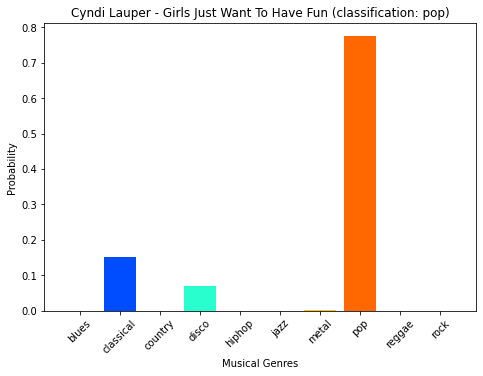

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def classifySong(imageFolder, model):
  all_predictions = []
  for im in os.listdir(imageFolder):
    image_data = keras.preprocessing.image.load_img(os.path.join(imageFolder,im),
                                                    color_mode='rgba',target_size=(256,256))
    image = keras.preprocessing.image.img_to_array(image_data)
    image = np.reshape(image,(1,256,256,4))
    prediction = model.predict(image/255)
    prediction = prediction.reshape((10,)) 
    all_predictions.append(prediction)
    
  all_predictions = np.asarray(all_predictions)
  overall_prediction = np.mean(all_predictions, axis=0)
  class_label = np.argmax(overall_prediction)

  class_labels = ['blues',
  'classical',
  'country',
  'disco',
  'hiphop',
  'jazz',
  'metal',
  'pop',
  'reggae',
  'rock']

  classification = class_labels[np.argmax(overall_prediction)]

  color_data = [1,2,3,4,5,6,7,8,9,10]
  cmap = mpl.cm.get_cmap('jet')
  cnorm = mpl.colors.Normalize(vmin=0, vmax=10)
  #fig,ax= plt.subplots(figsize=(6,4.5))
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.bar(x=class_labels,height=overall_prediction,
  color=cmap(cnorm(color_data)))
  plt.xticks(rotation=45)
  plt.xlabel('Musical Genres')
  plt.ylabel('Probability')
  ax.set_title('{} (classification: {})'.format(im.split('.chunk')[0],classification))

imageFolder = 'Girls/images'
classifySong(imageFolder, augmented_model)

In [ ]:
for a in overall_prediction:
  print(a)

1.923643e-09
0.15242603
5.2280873e-09
0.07017669
1.1322681e-08
1.7729397e-12
0.0035529356
0.77384424
5.0257297e-14
6.9024915e-09


In [ ]:
np.sum(overall_prediction)

0.9999999

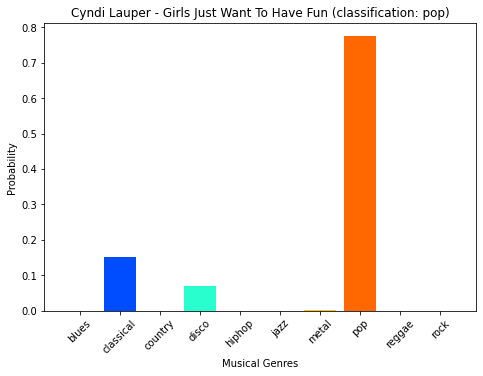

In [ ]:
imageFolder = 'Girls/images'
classifySong(imageFolder, augmented_model)

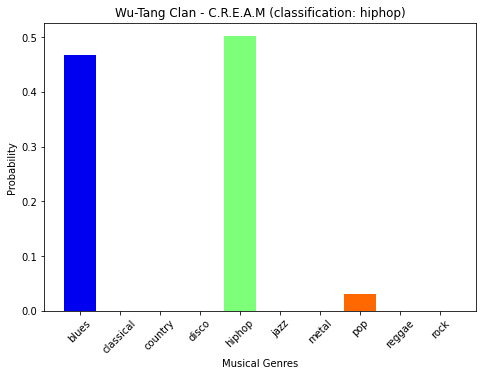

In [ ]:
imageFolder = 'CREAM/images'
classifySong(imageFolder, augmented_model)

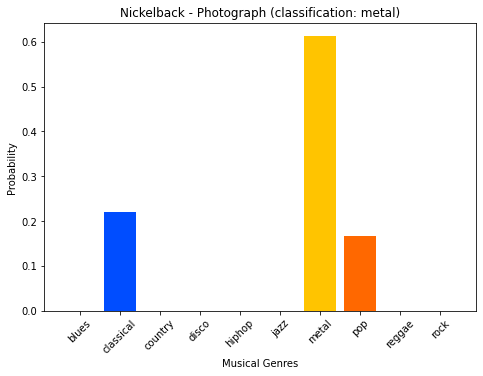

In [ ]:
imageFolder = 'Photograph/images'
classifySong(imageFolder, augmented_model)

In [ ]:
!pip install pydub

In [ ]:
import numpy as np
import os
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
from pydub import AudioSegment
from pydub.utils import make_chunks

def createAudioImages(inputFolder,inputFile,audioFolder,imageFolder, outputFile):

  mp3_file = os.path.join(inputFolder,inputFile)
  sound = AudioSegment.from_mp3(mp3_file)
  wav_file = os.path.join(inputFolder, outputFile + '.wav')
  sound.export(wav_file,format='wav')
  audioPlayer = ipd.Audio(wav_file)
  y,sr = librosa.load(wav_file)
  mels = librosa.feature.melspectrogram(y=y,sr=sr)
  p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
  plt.savefig(os.path.join(inputFolder, outputFile + '.png'))

  imageFolder = os.path.join(inputFolder,imageFolder)
  os.makedirs(imageFolder)

  audioFolder= os.path.join(inputFolder,audioFolder)
  os.makedirs(audioFolder)

  song = AudioSegment.from_file(wav_file, 'wav')
  chunk_length_ms = 3000
  chunks = make_chunks(song, chunk_length_ms)

  #Export all of the individual chunks as wav files
  for i, chunk in enumerate(chunks):
      if i < 10:
          chunk_name = wav_file.split('/')[1].split('.wav')[0] + '.chunk{0}.wav'.format(i)
          chunk_path = os.path.join(audioFolder,chunk_name)

          img_name = chunk_name.split('.wav')[0] + '.png'
          img_path = os.path.join(imageFolder,img_name)
          
          chunk.export(chunk_path, format='wav')
          y,sr = librosa.load(chunk_path)
          mels = librosa.feature.melspectrogram(y=y,sr=sr)
          melSpec = plt.imshow(librosa.power_to_db(mels,ref=np.max))
          plt.savefig(img_path)
          print('exporting ', chunk_name)

In [ ]:
cd model_tests/

/content/drive/MyDrive/MIR Experiments/model_tests


exporting  UB40 - Red Red Wine.chunk0.wav
exporting  UB40 - Red Red Wine.chunk1.wav
exporting  UB40 - Red Red Wine.chunk2.wav
exporting  UB40 - Red Red Wine.chunk3.wav
exporting  UB40 - Red Red Wine.chunk4.wav
exporting  UB40 - Red Red Wine.chunk5.wav
exporting  UB40 - Red Red Wine.chunk6.wav
exporting  UB40 - Red Red Wine.chunk7.wav
exporting  UB40 - Red Red Wine.chunk8.wav
exporting  UB40 - Red Red Wine.chunk9.wav


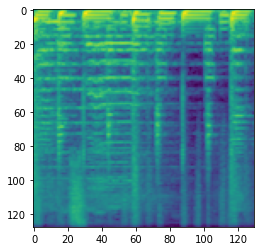

In [ ]:
inputFolder = 'RedWine'
inputFile = '01. UB40 - Red Red Wine_sample.mp3'
audioFolder = 'audio'
imageFolder = 'images'
outputFile = 'UB40 - Red Red Wine'
createAudioImages(inputFolder,inputFile,audioFolder,imageFolder, outputFile)

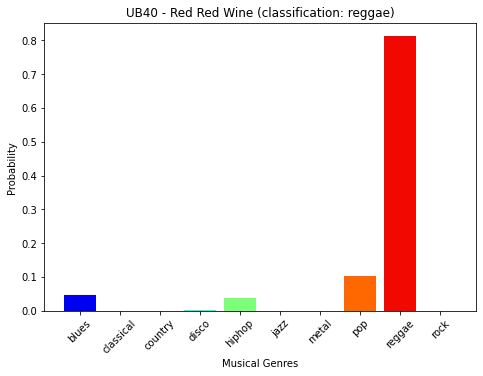

In [ ]:
imageFolder = 'RedWine/images'
classifySong(imageFolder, augmented_model)

exporting  Rolling Stones - Oh Baby (We Got a Good Thing Goin).chunk0.wav
exporting  Rolling Stones - Oh Baby (We Got a Good Thing Goin).chunk1.wav
exporting  Rolling Stones - Oh Baby (We Got a Good Thing Goin).chunk2.wav
exporting  Rolling Stones - Oh Baby (We Got a Good Thing Goin).chunk3.wav
exporting  Rolling Stones - Oh Baby (We Got a Good Thing Goin).chunk4.wav
exporting  Rolling Stones - Oh Baby (We Got a Good Thing Goin).chunk5.wav
exporting  Rolling Stones - Oh Baby (We Got a Good Thing Goin).chunk6.wav
exporting  Rolling Stones - Oh Baby (We Got a Good Thing Goin).chunk7.wav
exporting  Rolling Stones - Oh Baby (We Got a Good Thing Goin).chunk8.wav
exporting  Rolling Stones - Oh Baby (We Got a Good Thing Goin).chunk9.wav


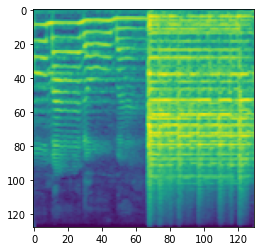

In [ ]:
inputFolder = 'OhBaby'
inputFile = "10. The Rolling Stones - Oh Baby (We Got a Good Thing Goin')_sample.mp3"
audioFolder = 'audio'
imageFolder = 'images'
outputFile = 'Rolling Stones - Oh Baby (We Got a Good Thing Goin)'
createAudioImages(inputFolder,inputFile,audioFolder,imageFolder, outputFile)

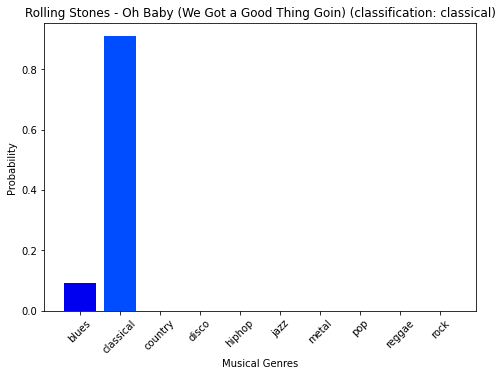

In [ ]:
imageFolder = 'OhBaby/images'
classifySong(imageFolder, augmented_model)

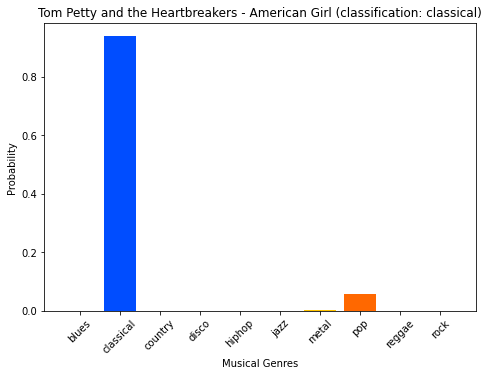

In [ ]:
imageFolder = 'American_Girl/images'
classifySong(imageFolder, augmented_model)

exporting  Hank Williams Jr. - Cowpoke.chunk0.wav
exporting  Hank Williams Jr. - Cowpoke.chunk1.wav
exporting  Hank Williams Jr. - Cowpoke.chunk2.wav
exporting  Hank Williams Jr. - Cowpoke.chunk3.wav
exporting  Hank Williams Jr. - Cowpoke.chunk4.wav
exporting  Hank Williams Jr. - Cowpoke.chunk5.wav
exporting  Hank Williams Jr. - Cowpoke.chunk6.wav
exporting  Hank Williams Jr. - Cowpoke.chunk7.wav
exporting  Hank Williams Jr. - Cowpoke.chunk8.wav
exporting  Hank Williams Jr. - Cowpoke.chunk9.wav


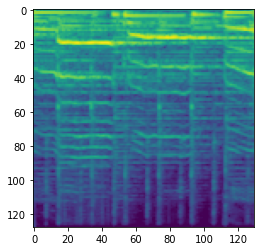

In [ ]:
inputFolder = 'Cowpoke'
inputFile = '01.03. Cowpoke_sample.mp3'
audioFolder = 'audio'
imageFolder = 'images'
outputFile = 'Hank Williams Jr. - Cowpoke'
createAudioImages(inputFolder,inputFile,audioFolder,imageFolder, outputFile)

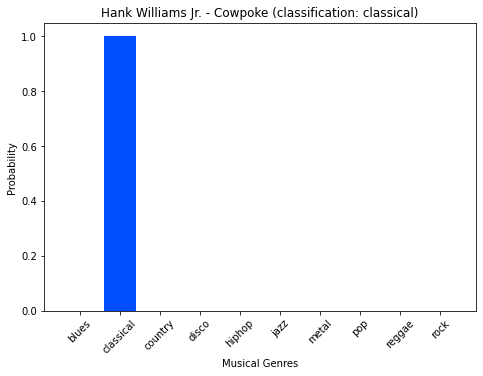

In [ ]:
imageFolder = 'Cowpoke/images'
classifySong(imageFolder, augmented_model)

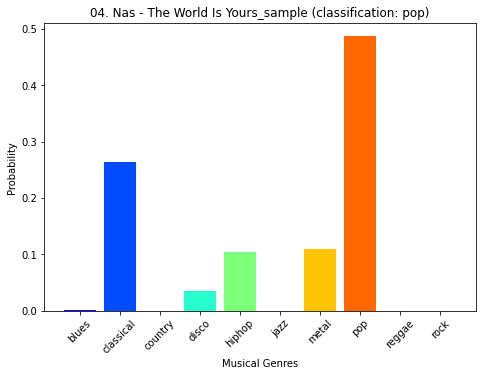

In [ ]:
imageFolder = 'The_World/images'
classifySong(imageFolder, augmented_model)

exporting  B.B. King - Ten Long Years.chunk0.wav
exporting  B.B. King - Ten Long Years.chunk1.wav
exporting  B.B. King - Ten Long Years.chunk2.wav
exporting  B.B. King - Ten Long Years.chunk3.wav
exporting  B.B. King - Ten Long Years.chunk4.wav
exporting  B.B. King - Ten Long Years.chunk5.wav
exporting  B.B. King - Ten Long Years.chunk6.wav
exporting  B.B. King - Ten Long Years.chunk7.wav
exporting  B.B. King - Ten Long Years.chunk8.wav
exporting  B.B. King - Ten Long Years.chunk9.wav


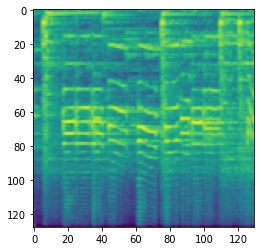

In [ ]:
inputFolder = 'tenLongYears'
inputFile = '05. B.B. King - Ten Long Years_sample.mp3'
audioFolder = 'audio'
imageFolder = 'images'
outputFile = 'B.B. King - Ten Long Years'
createAudioImages(inputFolder,inputFile,audioFolder,imageFolder, outputFile)

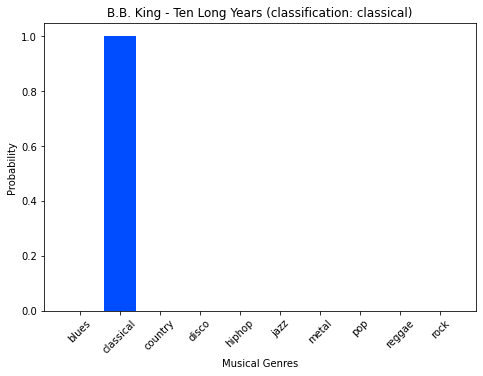

In [ ]:
imageFolder = 'tenLongYears/images'
classifySong(imageFolder, augmented_model)

In [ ]:
cd ..

/content/drive/MyDrive/MIR Experiments


In [ ]:
cd full_songs/

/content/drive/MyDrive/MIR Experiments/full_songs


In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio('images', output='sorted',
    seed=1337, ratio=(.8, .15, .05), group_prefix=None, move=False)

Copying files: 1000 files [00:15, 66.22 files/s]


In [ ]:
import os
genres = os.listdir('sorted/test')
for genre in genres:
  path = os.path.join('sorted/test', genre)
  num_files = len([f for f in os.listdir(path)if os.path.isfile(os.path.join(path, f))])
  print('genre: ', genre, 'number of files: ', num_files)

genre:  blues number of files:  5
genre:  classical number of files:  5
genre:  pop number of files:  5
genre:  reggae number of files:  5
genre:  metal number of files:  5
genre:  disco number of files:  5
genre:  hiphop number of files:  5
genre:  country number of files:  5
genre:  rock number of files:  5
genre:  jazz number of files:  5


In [ ]:
genres = os.listdir('sorted/val')
for genre in genres:
  path = os.path.join('sorted/val', genre)
  num_files = len([f for f in os.listdir(path)if os.path.isfile(os.path.join(path, f))])
  print('genre: ', genre, 'number of files: ', num_files)

genre:  blues number of files:  15
genre:  classical number of files:  15
genre:  pop number of files:  15
genre:  reggae number of files:  15
genre:  metal number of files:  15
genre:  disco number of files:  15
genre:  hiphop number of files:  15
genre:  country number of files:  15
genre:  rock number of files:  15
genre:  jazz number of files:  15


In [ ]:
import os
genres = os.listdir('sorted/train')
for genre in genres:
  path = os.path.join('sorted/train', genre)
  num_files = len([f for f in os.listdir(path)if os.path.isfile(os.path.join(path, f))])
  print('genre: ', genre, 'number of files: ', num_files)

genre:  blues number of files:  80
genre:  classical number of files:  80
genre:  pop number of files:  80
genre:  reggae number of files:  80
genre:  metal number of files:  80
genre:  disco number of files:  80
genre:  hiphop number of files:  80
genre:  country number of files:  80
genre:  rock number of files:  80
genre:  jazz number of files:  80


In [ ]:
train_dir = 'sorted/train/'
test_dir = 'sorted/test/'
val_dir = 'sorted/val/'

base_train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
base_train_generator = base_train_datagen.flow_from_directory(train_dir,color_mode='rgba',
                                                    class_mode='categorical',
                                                    batch_size=32)

base_test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
base_test_generator = base_test_datagen.flow_from_directory(test_dir,color_mode='rgba',
                                                    class_mode='categorical',
                                                    batch_size=32)

base_val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
base_val_generator = base_val_datagen.flow_from_directory(val_dir,color_mode='rgba',
                                                    class_mode='categorical',
                                                    batch_size=32)

#flow_from_directory loads the images as size 256x256 as default.
input_shape = (256,256,4)

#build the model
base_model = generate_model(input_shape)
base_model.summary()

#train the CNN
base_history = base_model.fit(base_train_generator,epochs=100,validation_data=base_val_generator)

#evaluate the CNN on the test set
base_test_error, base_test_accuracy = augmented_model.evaluate(base_test_generator, verbose=1)
print("Accuracy on test set is: {}".format(base_test_accuracy))

Found 800 images belonging to 10 classes.
Found 50 images belonging to 10 classes.
Found 150 images belonging to 10 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 16)      592       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 batch_normalization_10 (Bat  (None, 127, 127, 16)     64        
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 62, 62, 32)       0     

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


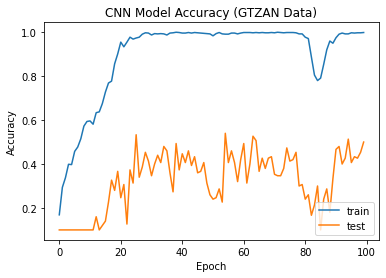

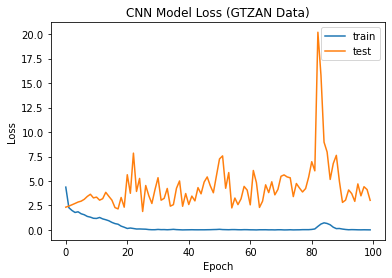

In [ ]:
print(base_history.history.keys())
# summarize history for accuracy
fig = plt.figure()
plt.plot(base_history.history['accuracy'])
plt.plot(base_history.history['val_accuracy'])
plt.title('CNN Model Accuracy (GTZAN Data)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
fig = plt.figure()
plt.plot(base_history.history['loss'])
plt.plot(base_history.history['val_loss'])
plt.title('CNN Model Loss (GTZAN Data)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
pwd

'/content/drive/MyDrive/MIR Experiments/full_songs'

In [ ]:
cd ..

/content/drive/MyDrive/MIR Experiments


In [ ]:
cd model_tests/

/content/drive/MyDrive/MIR Experiments/model_tests


Text(0.5, 1.0, 'UB40 - Red Red Wine (classification: country)')

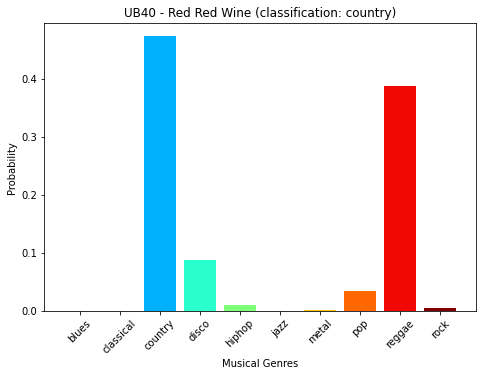

In [ ]:
imageFile = 'RedWine/UB40 - Red Red Wine.png'
image_data = keras.preprocessing.image.load_img(imageFile,
                                                color_mode='rgba',target_size=(256,256))
image = keras.preprocessing.image.img_to_array(image_data)
image = np.reshape(image,(1,256,256,4))
prediction = base_model.predict(image/255)
prediction = prediction.reshape((10,)) 

class_labels = ['blues',
'classical',
'country',
'disco',
'hiphop',
'jazz',
'metal',
'pop',
'reggae',
'rock']

classification = class_labels[np.argmax(prediction)]

color_data = [1,2,3,4,5,6,7,8,9,10]
cmap = mpl.cm.get_cmap('jet')
cnorm = mpl.colors.Normalize(vmin=0, vmax=10)
#fig,ax= plt.subplots(figsize=(6,4.5))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x=class_labels,height=prediction,
color=cmap(cnorm(color_data)))
plt.xticks(rotation=45)
plt.xlabel('Musical Genres')
plt.ylabel('Probability')
ax.set_title('{} (classification: {})'.format(imageFile.split('.png')[0].split('/')[1],classification))

Text(0.5, 1.0, 'George Strait - Amarillo by Morning (classification: country)')

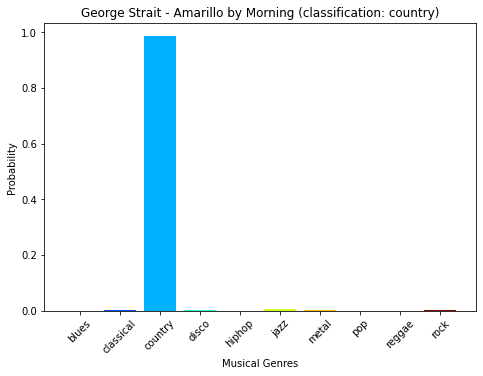

In [ ]:
imageFile = 'Amarillo/George Strait - Amarillo by Morning.png'
image_data = keras.preprocessing.image.load_img(imageFile,
                                                color_mode='rgba',target_size=(256,256))
image = keras.preprocessing.image.img_to_array(image_data)
image = np.reshape(image,(1,256,256,4))
prediction = base_model.predict(image/255)
prediction = prediction.reshape((10,)) 

class_labels = ['blues',
'classical',
'country',
'disco',
'hiphop',
'jazz',
'metal',
'pop',
'reggae',
'rock']

classification = class_labels[np.argmax(prediction)]

color_data = [1,2,3,4,5,6,7,8,9,10]
cmap = mpl.cm.get_cmap('jet')
cnorm = mpl.colors.Normalize(vmin=0, vmax=10)
#fig,ax= plt.subplots(figsize=(6,4.5))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x=class_labels,height=prediction,
color=cmap(cnorm(color_data)))
plt.xticks(rotation=45)
plt.xlabel('Musical Genres')
plt.ylabel('Probability')
ax.set_title('{} (classification: {})'.format(imageFile.split('.png')[0].split('/')[1],classification))

Text(0.5, 1.0, 'Wu-Tang Clan - C.R.E.A.M (classification: reggae)')

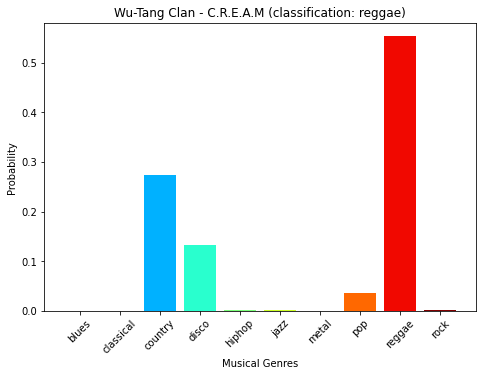

In [ ]:
imageFile = 'CREAM/Wu-Tang Clan - C.R.E.A.M.png'
image_data = keras.preprocessing.image.load_img(imageFile,
                                                color_mode='rgba',target_size=(256,256))
image = keras.preprocessing.image.img_to_array(image_data)
image = np.reshape(image,(1,256,256,4))
prediction = base_model.predict(image/255)
prediction = prediction.reshape((10,)) 

class_labels = ['blues',
'classical',
'country',
'disco',
'hiphop',
'jazz',
'metal',
'pop',
'reggae',
'rock']

classification = class_labels[np.argmax(prediction)]

color_data = [1,2,3,4,5,6,7,8,9,10]
cmap = mpl.cm.get_cmap('jet')
cnorm = mpl.colors.Normalize(vmin=0, vmax=10)
#fig,ax= plt.subplots(figsize=(6,4.5))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x=class_labels,height=prediction,
color=cmap(cnorm(color_data)))
plt.xticks(rotation=45)
plt.xlabel('Musical Genres')
plt.ylabel('Probability')
ax.set_title('{} (classification: {})'.format(imageFile.split('.png')[0].split('/')[1],classification))

Text(0.5, 1.0, 'Tom Petty and the Heartbreakers - American Girl (classification: disco)')

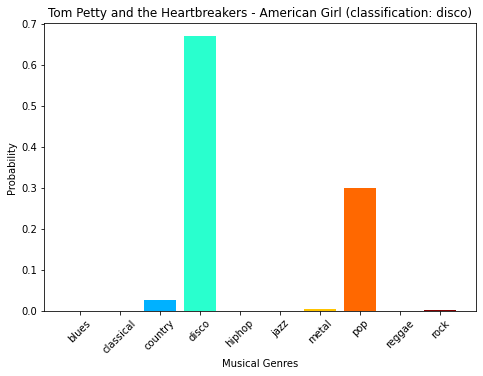

In [ ]:
imageFile = 'American_Girl/Tom Petty and the Heartbreakers - American Girl.png'
image_data = keras.preprocessing.image.load_img(imageFile,
                                                color_mode='rgba',target_size=(256,256))
image = keras.preprocessing.image.img_to_array(image_data)
image = np.reshape(image,(1,256,256,4))
prediction = base_model.predict(image/255)
prediction = prediction.reshape((10,)) 

class_labels = ['blues',
'classical',
'country',
'disco',
'hiphop',
'jazz',
'metal',
'pop',
'reggae',
'rock']

classification = class_labels[np.argmax(prediction)]

color_data = [1,2,3,4,5,6,7,8,9,10]
cmap = mpl.cm.get_cmap('jet')
cnorm = mpl.colors.Normalize(vmin=0, vmax=10)
#fig,ax= plt.subplots(figsize=(6,4.5))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x=class_labels,height=prediction,
color=cmap(cnorm(color_data)))
plt.xticks(rotation=45)
plt.xlabel('Musical Genres')
plt.ylabel('Probability')
ax.set_title('{} (classification: {})'.format(imageFile.split('.png')[0].split('/')[1],classification))

In [ ]:
pwd

'/content/drive/MyDrive/MIR Experiments/model_tests'

Text(0.5, 1.0, '01. Junior Kimbrough - Meet Me in the City_sample (classification: classical)')

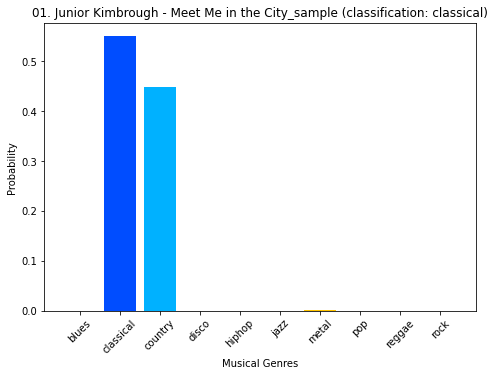

In [ ]:
imageFile = 'Meet_Me/01. Junior Kimbrough - Meet Me in the City_sample.png'
image_data = keras.preprocessing.image.load_img(imageFile,
                                                color_mode='rgba',target_size=(256,256))
image = keras.preprocessing.image.img_to_array(image_data)
image = np.reshape(image,(1,256,256,4))
prediction = base_model.predict(image/255)
prediction = prediction.reshape((10,)) 

class_labels = ['blues',
'classical',
'country',
'disco',
'hiphop',
'jazz',
'metal',
'pop',
'reggae',
'rock']

classification = class_labels[np.argmax(prediction)]

color_data = [1,2,3,4,5,6,7,8,9,10]
cmap = mpl.cm.get_cmap('jet')
cnorm = mpl.colors.Normalize(vmin=0, vmax=10)
#fig,ax= plt.subplots(figsize=(6,4.5))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x=class_labels,height=prediction,
color=cmap(cnorm(color_data)))
plt.xticks(rotation=45)
plt.xlabel('Musical Genres')
plt.ylabel('Probability')
ax.set_title('{} (classification: {})'.format(imageFile.split('.png')[0].split('/')[1],classification))